# Task 1.1

In [398]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

In [399]:
# 导入数据
data= pd.read_csv('train.csv')
print(data.columns.values)
combine = [data]

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [400]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [402]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [403]:
# Drop Cabin, Ticket, Name and PassengerId.

print('before:', data.shape)

data = data.drop(['Ticket', 'Cabin','Name', 'PassengerId'], axis=1)


print('after:', data.shape)

before: (891, 12)
after: (891, 8)


In [404]:
data.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [405]:
data.info()

# there are Age=714 and Embarked=889 laking data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [406]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [407]:
# Category new data in Sex.

combine = [data]

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [408]:
# Completing the age data

guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_data.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,S
1,1,1,1,38,1,0,71.2833,C
2,1,3,1,26,0,0,7.9250,S
3,1,1,1,35,1,0,53.1000,S
4,0,3,0,35,0,0,8.0500,S


In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.9+ KB


In [410]:
# Completing the embarked data

freq_port = data.Embarked.dropna().mode()[0]
freq_port

'S'

In [411]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.9+ KB


In [413]:
# Category the new data in embarked data

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


In [414]:
# Training data with DT model


X = data.drop(['Survived'], axis = 1)
y = data['Survived']
print('x',X)
print('\n')
print('y',y)

x      Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0         3    0   22      1      0   7.2500         0
1         1    1   38      1      0  71.2833         1
2         3    1   26      0      0   7.9250         0
3         1    1   35      1      0  53.1000         0
4         3    0   35      0      0   8.0500         0
..      ...  ...  ...    ...    ...      ...       ...
886       2    0   27      0      0  13.0000         0
887       1    1   19      0      0  30.0000         0
888       3    1   21      1      2  23.4500         0
889       1    0   26      0      0  30.0000         1
890       3    0   32      0      0   7.7500         2

[891 rows x 7 columns]


y 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Task 1.2

In [415]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.33, random_state = 42)

DT_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DT_gini.fit(X_train, y_train)

y_pred_gini = DT_gini.predict(X_test)

print('model accuracy score with criterion gini index :{0:0.4f}'. format(accuracy_score(y_test,y_pred_gini)))


model accuracy score with criterion gini index :0.8203


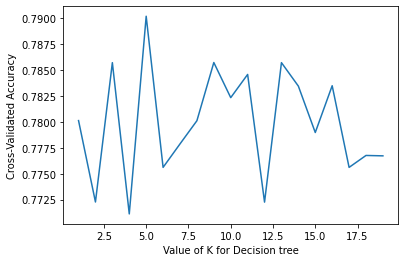

In [422]:
# fine tune

kfold_range = range(1,20)
kfold_scores = []

for k in kfold_range :
    DT_gini = DecisionTreeClassifier(criterion='gini')
    scores = cross_val_score(DT_gini, X, y, cv=10, scoring='accuracy')
    kfold_scores.append(scores.mean())
    
plt.plot(kfold_range, kfold_scores)
plt.xlabel('Value of K for Decision tree')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### It could be seen that cross_validation=5 is the best one. 

[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.25, 0.625, 'x[2] <= 3.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.125, 0.375, 'x[3] <= 3.0\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.375, 'x[5] <= 52.277\ngini = 0.278\nsamples = 377\nvalue = [314, 63]'),
 Text(0.3125, 0.125, 'gini = 0.239\nsamples = 332\nvalue = [286, 46]'),
 Text(0.4375, 0.125, 'gini = 0.47\nsamples = 45\nvalue = [28, 17]'),
 Text(0.75, 0.625, 'x[0] <= 2.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]'),
 Text(0.625, 0.375, 'x[2] <= 2.5\ngini = 0.072\nsamples = 107\nvalue = [4, 103]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6875, 0.125, 'gini = 0.056\nsamples = 105\nvalue = [3, 102]'),
 Text(0.875, 0.375, 'x[5] <= 23.35\ngini = 0.498\nsamples = 99\nvalue = [53, 46]'),
 Text(0.8

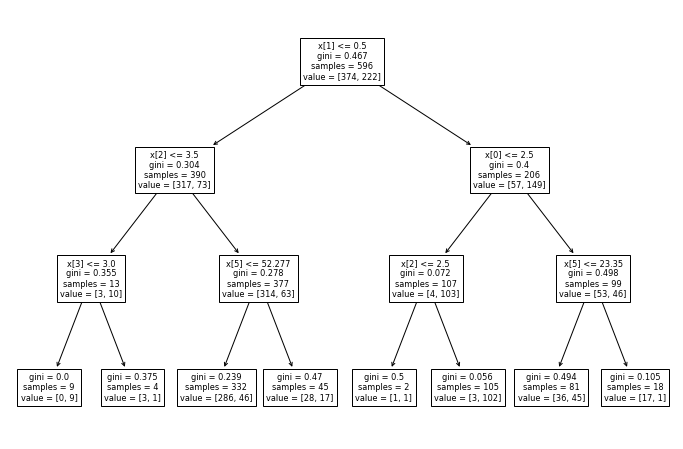

In [424]:
# visualization 

plt.figure(figsize = (12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train,y_train))

In [425]:
# fine-tune
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.32, random_state = 42)

DT_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DT_gini.fit(X_train, y_train)

# Acquire the prediction results
y_pred_gini = DT_gini.predict(X_test)

print('model accuracy score with criterion gini index :{0:0.4f}'. format(accuracy_score(y_test,y_pred_gini)))


model accuracy score with criterion gini index :0.8217


# Task 1.3

In [426]:
from sklearn.model_selection import cross_val_score

X = data.drop(['Survived'], axis = 1)
y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.33,random_state=42)

DT= DecisionTreeClassifier(criterion='gini',  max_depth=5)

DT_gini.fit(X_train, y_train)

scores = cross_val_score(DT_gini, X, y, cv=5, scoring='accuracy')

print("5-fold cross validation Decision Tree accuracy results:",scores)
print('\n')

print("5-fold cross validation Decision Tree MEAN accuracy results:",scores.mean())

5-fold cross validation Decision Tree accuracy results: [0.81564246 0.81460674 0.81460674 0.78089888 0.80898876]


5-fold cross validation Decision Tree MEAN accuracy results: 0.8069487163392128


# Task 1.4

In [427]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X = data.drop(['Survived'], axis = 1)
y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X, y)

# X_train, y_train = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
RF = RandomForestClassifier(max_depth=5, random_state=0)
RF.fit(X_train, y_train)

scores = cross_val_score(RF, X, y, cv=5, scoring='accuracy')

print("5-fold cross validation Random Forest accuracy results:",scores)
print('\n')

print("5-fold cross validation Random Forest MEAN accuracy results:",scores.mean())

5-fold cross validation Random Forest accuracy results: [0.79888268 0.82022472 0.85955056 0.78651685 0.86516854]


5-fold cross validation Random Forest MEAN accuracy results: 0.8260686711443098


# Task 1.5

#### Based on the result of average accuracy of Decision tree and Random forest, It could be found Random Forest (0.83) > Decision Tree(0.81)